**2.1 Изменение размерности списков**

In [3]:
import numpy as np

In [2]:
score = np.array([3,4,5,7,9, 10])

In [6]:
pairs = score.reshape(3,2)
pairs

array([[ 3,  4],
       [ 5,  7],
       [ 9, 10]])

In [7]:
pairs.ndim

2

In [8]:
pairs.transpose()

array([[ 3,  5,  9],
       [ 4,  7, 10]])

In [9]:
T = pairs.transpose()

In [12]:
T.ravel()

array([ 3,  5,  9,  4,  7, 10])

**2.2 Изменение списков**

In [13]:
pairs2 = pairs

In [14]:
pairs2

array([[ 3,  4],
       [ 5,  7],
       [ 9, 10]])

In [16]:
pairs2[0][0] = 4

In [17]:
pairs2

array([[ 4,  4],
       [ 5,  7],
       [ 9, 10]])

In [20]:
pairs3 = pairs2.copy()

In [22]:
pairs3

array([[ 4,  4],
       [ 5,  7],
       [ 9, 10]])

In [23]:
pairs[0:2]=[[5,4], [4,6]]

In [24]:
pairs

array([[ 5,  4],
       [ 4,  6],
       [ 9, 10]])

**2.3 Создание новых списков на основе старых**

In [25]:
income = np.array([[20000, 30000, 25000, 700000],
                   [23000,35000,20000,32000]])

In [26]:
np.log(income)

array([[ 9.90348755, 10.30895266, 10.1266311 , 13.45883561],
       [10.04324949, 10.46310334,  9.90348755, 10.37349118]])

In [28]:
%matplotlib inline 
from matplotlib import pyplot as plt 

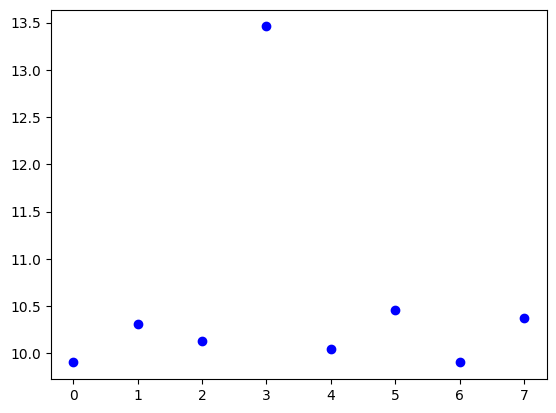

In [31]:
plt.plot(np.arange(8), np.log(income).flatten(), 'bo')

In [33]:
L = [3,2,4,5,6]
L = [i**2 for i in L]
L

[9, 4, 16, 25, 36]

**2.4 Дополнительные концепции NumPy**

M = np.arange(1,10,0.0003)
M

In [13]:
M.round(2)

array([ 1.,  1.,  1., ..., 10., 10., 10.])

In [18]:
A = np.array([2.5,3.7,4.2,5.1,6.8])

In [19]:
np.floor(A)

array([2., 3., 4., 5., 6.])

In [20]:
np.ceil(A)

array([3., 4., 5., 6., 7.])

In [21]:
np.add(A,2)

array([4.5, 5.7, 6.2, 7.1, 8.8])

In [22]:
np.subtract(A,1)

array([1.5, 2.7, 3.2, 4.1, 5.8])

In [24]:
np.sum(A)

22.3

In [25]:
np.prod(A)

1347.318

In [26]:
d1 = "2019-02-03"
d2 = "2019-02-04"

In [27]:
np.datetime64(d1)

numpy.datetime64('2019-02-03')

In [28]:
np.datetime64(d2) - np.datetime64(d1)

numpy.timedelta64(1,'D')

**2.5 Структурированные списки**

In [32]:
info = np.array([("Ann",23,167),("Sam",24,180),("Alex",25,190)],
                dtype = [("name", "U10"),("age", int),("height", float)])

In [33]:
info

array([('Ann', 23, 167.), ('Sam', 24, 180.), ('Alex', 25, 190.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('height', '<f8')])

In [34]:
np.save("info.npy", info)

In [35]:
new = np.load("info.npy")

In [36]:
new

array([('Ann', 23, 167.), ('Sam', 24, 180.), ('Alex', 25, 190.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('height', '<f8')])

In [37]:
ages = ([61,73,86,97])

In [38]:
np.savetxt("ages.txt", ages)

In [39]:
np.array2string(info)

"[('Ann', 23, 167.) ('Sam', 24, 180.) ('Alex', 25, 190.)]"

In [47]:
np.array(ages).tolist()

[61, 73, 86, 97]